# (28) Simulation -- self [velocity: new way]

**Motivation**: Velocity added but in a new way. Debugged. <br>

In [1]:
# HIDE CODE


import os
import sys
from copy import deepcopy as dc
from os.path import join as pjoin
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
extras_dir = pjoin(git_dir, 'jb-MTMST/_extras')
fig_base_dir = pjoin(git_dir, 'jb-MTMST/figs')
tmp_dir = pjoin(git_dir, 'jb-MTMST/tmp')

# GitHub
sys.path.insert(0, pjoin(git_dir, '_MTMST'))
from analysis.opticflow import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
from rich.jupyter import print
%matplotlib inline
set_style()

In [2]:
# HIDE CODE


def show_thetaphi(t, p):
    fig, axes = create_figure(1, 4, (13, 2.5), tight_layout=True)
    im = axes[0].imshow(t, cmap='nipy_spectral')
    plt.colorbar(im, ax=axes[0])

    im = axes[2].imshow(p, cmap='hsv', vmin=0, vmax=2*np.pi)
    plt.colorbar(im, ax=axes[2])

    for ax in [axes[0], axes[2]]:
        ax.invert_yaxis()
        ax.tick_params(labelsize=10)
        ax.set(
            xticks=ticks,
            yticks=ticks,
            xticklabels=ticklabels,
            yticklabels=ticklabels,
        )

    axes[1].axvline(np.deg2rad(fov), color='r', ls='--', label=f'{fov} deg')
    sns.histplot(
        t.ravel(), ax=axes[1], label=r'$\theta$',
        bins=np.linspace(0, np.pi/2, 91), stat='count')
    sns.histplot(
        p.ravel(), ax=axes[3], label=r'$\phi$', color='C0',
        bins=np.linspace(0, 2*np.pi, 37), stat='count')
    
    sns.histplot(
        p[t <= np.deg2rad(fov)], ax=axes[3], label=r'$\phi$' + f' (<{fov})', color='C1',
        bins=np.linspace(0, 2*np.pi, 37), stat='count')
    for ax in [axes[1], axes[3]]:
        ax.set_ylabel('')
        ax.legend(fontsize=8, loc='upper left')

    plt.show()
    
    
def show_xyzd(x, y, z, d, cmap='Spectral', grid=False):
    fig, axes = create_figure(1, 4, (12, 2.5), 'all', 'all', tight_layout=True)
    im = axes[0].imshow(x, cmap=cmap)
    plt.colorbar(im, ax=axes[0])
    axes[0].set_title(r'$x$', y=1.02, fontsize=17)

    im = axes[1].imshow(y, cmap=cmap)
    plt.colorbar(im, ax=axes[1])
    axes[1].set_title(r'$y$', y=1.02, fontsize=17)

    im = axes[2].imshow(z, cmap=cmap)
    plt.colorbar(im, ax=axes[2])
    axes[2].set_title(r'$z$', y=1.02, fontsize=17)

    im = axes[3].imshow(d, cmap=cmap)
    plt.colorbar(im, ax=axes[3])
    axes[3].set_title(r'$d = \sqrt{x^2+y^2+z^2}$', y=1.02, fontsize=14)

    axes[-1].invert_yaxis()
    for ax in axes.flat:
        ax.tick_params(labelsize=10)
        ax.set(
            xticks=ticks,
            yticks=ticks,
            xticklabels=ticklabels,
            yticklabels=ticklabels,
        )
    if grid:
        add_grid(axes)
    plt.show()
    
    
def hist_xyzd(x, y, d, z=None, bins=30):
    kws = {
        'bins': bins,
        'stat': 'percent',
    }
    fig, axes = create_figure(2, 4, (13, 5), sharey='all', constrained_layout=True)
    sns.histplot(x.ravel(), ax=axes[0, 0], **kws)
    sns.histplot(y.ravel(), ax=axes[0, 1], **kws)
    if z is not None:
        sns.histplot(z.ravel(), ax=axes[0, 2], **kws)
    sns.histplot(d.ravel(), ax=axes[0, 3], **kws)

    sns.histplot(x[of.theta < np.deg2rad(fov)], ax=axes[1, 0], **kws)
    sns.histplot(y[of.theta < np.deg2rad(fov)], ax=axes[1, 1], **kws)
    if z is not None:
        sns.histplot(z[of.theta < np.deg2rad(fov)], ax=axes[1, 2], **kws)
    sns.histplot(d[of.theta < np.deg2rad(fov)], ax=axes[1, 3], **kws)
    
    axes[0, 0].set_title(r'$x$', y=1.02, fontsize=17)
    axes[0, 1].set_title(r'$y$', y=1.02, fontsize=17)
    axes[0, 2].set_title(r'$z$', y=1.02, fontsize=17)
    axes[0, 3].set_title(r'$d$', y=1.02, fontsize=17)
    
    plt.show()
    

def show_velocity(v, cmap='Spectral_r', grid=False):
    rho, phi = vel2polar(v)
    vminmax = np.max(np.abs(v))
    kws = dict(
        cmap='bwr',
        vmax=vminmax,
        vmin=-vminmax,
    )
    fig, axes = create_figure(1, 4, (12, 2.5), 'all', 'all', tight_layout=True)
    im = axes[0].imshow(v[..., 0], **kws)
    plt.colorbar(im, ax=axes[0])
    axes[0].set_title(r'$v_x$', y=1.02, fontsize=17)

    im = axes[1].imshow(v[..., 1], **kws)
    plt.colorbar(im, ax=axes[1])
    axes[1].set_title(r'$v_y$', y=1.02, fontsize=17)

    im = axes[2].imshow(rho, cmap=cmap)
    plt.colorbar(im, ax=axes[2])
    axes[2].set_title(r'$\rho$', y=1.02, fontsize=17)

    im = axes[3].imshow(phi, cmap='hsv', vmin=0, vmax=2*np.pi)
    plt.colorbar(im, ax=axes[3])
    axes[3].set_title(r'$\phi$', y=1.02, fontsize=14)

    axes[-1].invert_yaxis()
    for ax in axes.flat:
        ax.tick_params(labelsize=10)
        ax.set(
            xticks=ticks,
            yticks=ticks,
            xticklabels=ticklabels,
            yticklabels=ticklabels,
        )
    if grid:
        add_grid(axes)
    plt.show()


from skimage.transform import resize

def show_opticflow(v):
    fig, axes = create_figure(1, 3, (12, 4), constrained_layout=True)
    axes[0].quiver(
        range(-2, 2 + 1),
        range(-2, 2 + 1),
        resize(v[..., 0], (4+1,) * 2),
        resize(v[..., 1], (4+1,) * 2),
        # scale=150,
    )
    axes[1].quiver(
        range(-4, 4 + 1),
        range(-4, 4 + 1),
        resize(v[..., 0], (8+1,) * 2),
        resize(v[..., 1], (8+1,) * 2),
        # scale=100,
    )
    axes[2].quiver(
        range(-8, 8 + 1),
        range(-8, 8 + 1),
        resize(v[..., 0], (16+1,) * 2),
        resize(v[..., 1], (16+1,) * 2),
        # scale=100,
    )
    ax_square(axes)
    plt.show()

## Approach

Obtained by rotating yourself along x or y axis and finding angles such that the cosine ($\Delta \sigma$) becomes smallest at an appropriate angle:
$$\tan\alpha = \tan\theta \cos\phi$$
$$\tan\beta = \tan\theta \sin\phi$$

Given $(\alpha, \beta)$ you can find $(\theta, \phi)$ like this:
$$\tan\theta = \sqrt{\tan^2\alpha + \tan^2\beta}$$
$$\tan\phi = \frac{\tan\beta}{\tan\alpha}$$

More useful identities:

$$x = r\sin\theta \cos\phi = z\tan\alpha$$
$$x = r\sin\theta \sin\phi = z\tan\beta$$

### Update:

Used the following crucial identity to write code:

$$d\cos\theta\big[R . (\tan\alpha, \tan\beta, 1)^T\big] = Z = cte.$$

Because $Z > 0$, then we have

$$[R . (\tan\alpha, \tan\beta, 1)^T]_3 = R_{31}\tan\alpha + R_{32}\tan\beta + R_{33} > 0.$$

But we have $R_{31} = -\sin\Theta_0\cos\Phi_0$, $R_{32} = -\sin\Theta_0\sin\Phi_0$, and $R_{33} = \cos\Theta_0$. Substitute this to above equation to get

$$\tan\Theta_0\big[ \cos\Phi_0\tan\alpha + \sin\Phi_0\tan\beta \big] < 1,$$
$$\Rightarrow \frac{\sqrt{X_0^2 + Y_0^2}}{Z} \Bigg[ \frac{X_0}{\sqrt{X_0^2 + Y_0^2}}\tan\alpha + \frac{Y_0}{\sqrt{X_0^2 + Y_0^2}}\tan\beta \Bigg] < 1,$$
\begin{equation}
\Rightarrow  \boxed{\frac{X_0}{Z}\tan\alpha + \frac{Y_0}{Z}\tan\beta < 1}.
\end{equation}

Values of $\alpha$ and $\beta$ are bounded by FOV.  For instance, if FOV is 30 degrees, then $-30^{\circ} \leq \alpha, \beta \leq 30^{\circ}$, which means

$$|X_0| + |Y_0| < \frac{1}{\tan(30^{\circ})}.$$

### Adding velocity

**TODO:** add math later

## Test

Reminder: fixtion point (i.e, ```self.fix```) exists in fixed coordinates (i.e., $X,Y,Z$)

In [3]:
fix = np.array([[0, 0], [0.3, 0], [0, 0.3], [0.3, 0.3]])
fix.shape

(4, 2)

In [4]:
fov = 45
res = 0.1

of = OpticFlow(
    fov=fov,
    res=res,
).compute_coords(fix=fix)

In [5]:
ticks, ticklabels = zip(*[
    (i, str(int(np.round(np.rad2deg(x)))))
    for i, x in enumerate(of.span) if i % 150 == 0
])
ticklabels

('-45', '-30', '-15', '0', '15', '30', '45')

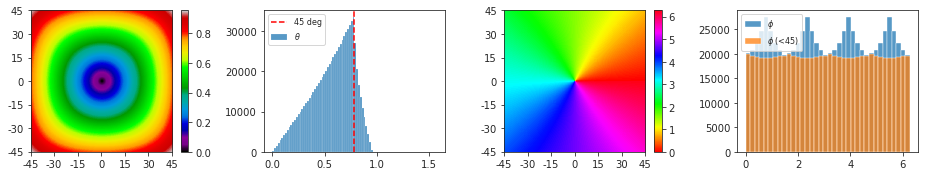

In [6]:
show_thetaphi(of.theta, of.phi)

In [7]:
vel = np.array([
    [0, 0, 10],
    [0, 0, -10],
    [5, 5, 0],
    [1, -2, 0],
    [3, 0, 10],
    [3, 3, 1],
    [-2, 1, 5],
], dtype=float).T
vel.shape

(3, 7)

In [8]:
vel

array([[  0.,   0.,   5.,   1.,   3.,   3.,  -2.],
       [  0.,   0.,   5.,  -2.,   0.,   3.,   1.],
       [ 10., -10.,   0.,   0.,  10.,   1.,   5.]])

In [9]:
%%time

v_final, v, v_rot = of.compute_flow(vel)

CPU times: user 1.63 s, sys: 144 ms, total: 1.78 s
Wall time: 1.77 s


In [10]:
v_final.shape

(4, 901, 901, 3, 7)

In [11]:
%%time

a = v_final[..., 0, :] * of.x[..., [2]] - v_final[..., 2, :] * of.x[..., [0]]
a /= sp_lin.norm(of.x[..., [0, 2]], axis=-1, keepdims=True) ** 2

b = v_final[..., 1, :] * of.x[..., [2]] - v_final[..., 2, :] * of.x[..., [1]]
b /= sp_lin.norm(of.x[..., [1, 2]], axis=-1, keepdims=True) ** 2

alpha_dot = np.concatenate([
    np.expand_dims(a, axis=-2),
    np.expand_dims(b, axis=-2),
], axis=-2)
alpha_dot.shape

CPU times: user 578 ms, sys: 180 ms, total: 759 ms
Wall time: 757 ms


(4, 901, 901, 2, 7)

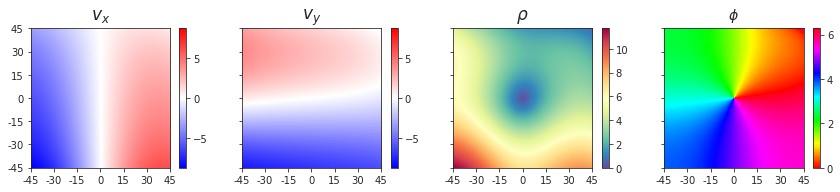

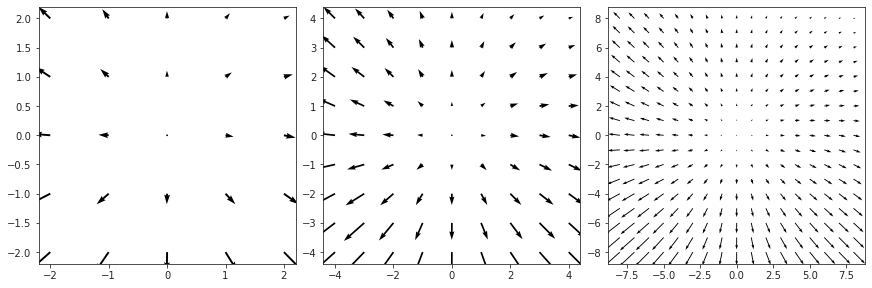

In [14]:
i, j = 3, 4
show_velocity(alpha_dot[i, ..., j])
show_opticflow(alpha_dot[i, ..., j])

In [20]:
rho, theta = vel2polar(alpha_dot[i, ..., j])
np.unravel_index(np.argmin(rho), rho.shape)

(450, 450)

In [21]:
rho[450, 450]

2.0517770523394535e-15

In [24]:
np.round(alpha_dot[:, of.dim//2][:, of.dim//2], 14)

array([[[ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.]],

       [[ 0., -0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.]],

       [[ 0., -0.,  0.,  0.,  0.,  0.,  0.],
        [ 0., -0.,  0., -0.,  0.,  0.,  0.]],

       [[-0.,  0.,  0.,  0., -0., -0., -0.],
        [-0.,  0., -0.,  0., -0., -0., -0.]]])

fixation: [0. 0.],      velocity: [ 0.  0. 10.]

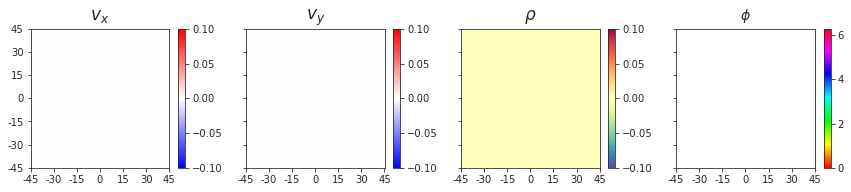

/home/hadi/anaconda3/lib/python3.8/site-packages/matplotlib/quiver.py:679: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/home/hadi/anaconda3/lib/python3.8/site-packages/matplotlib/quiver.py:679: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


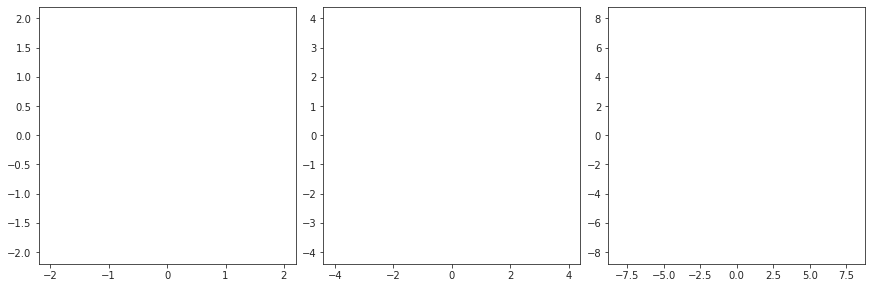

--------------------------------------------------------------------------------

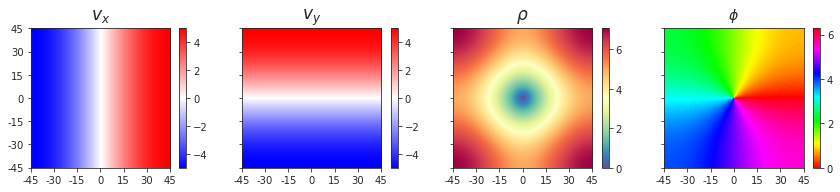

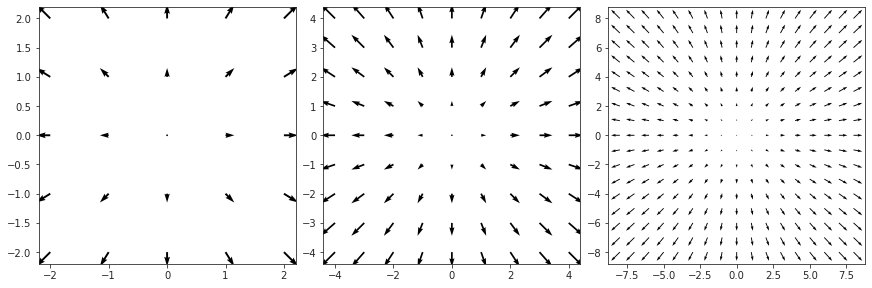

--------------------------------------------------------------------------------

--------------------------------------------------------------------------------

fixation: [0. 0.],      velocity: [  0.   0. -10.]

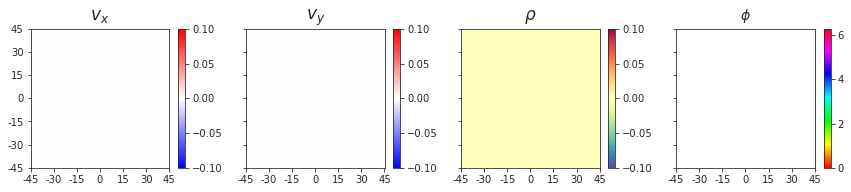

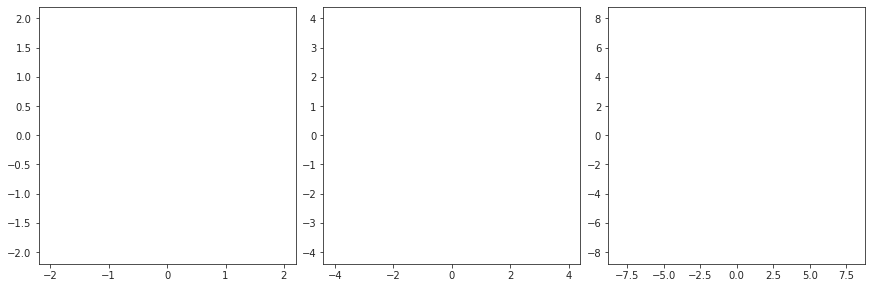

--------------------------------------------------------------------------------

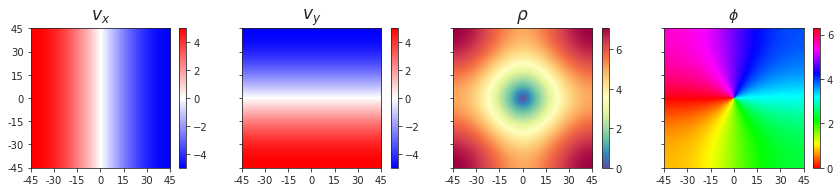

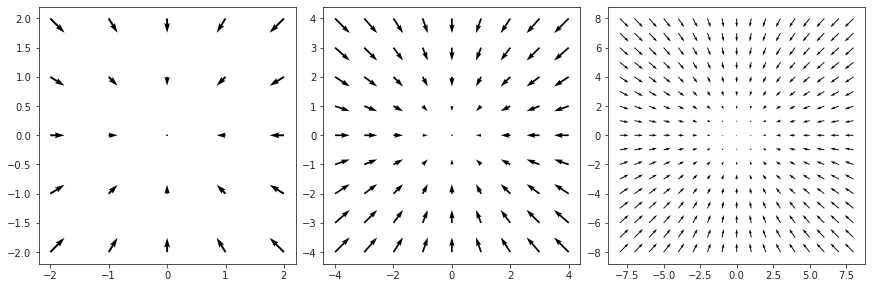

--------------------------------------------------------------------------------

--------------------------------------------------------------------------------

fixation: [0. 0.],      velocity: [5. 5. 0.]

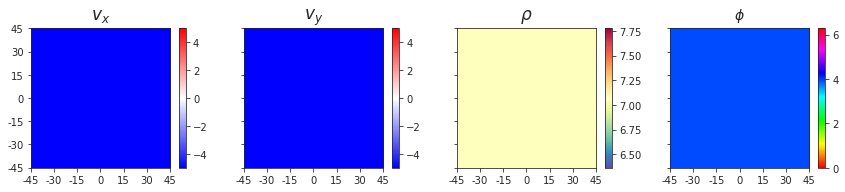

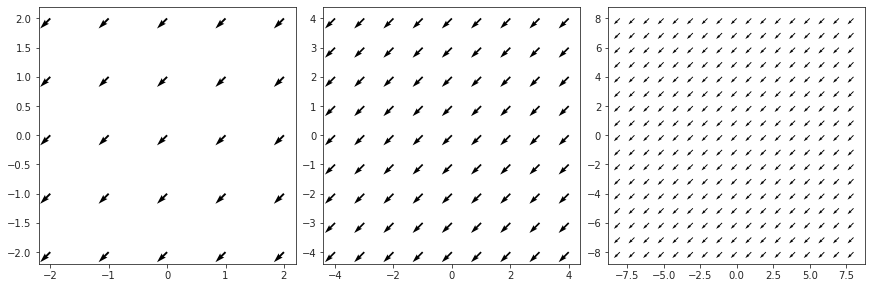

--------------------------------------------------------------------------------

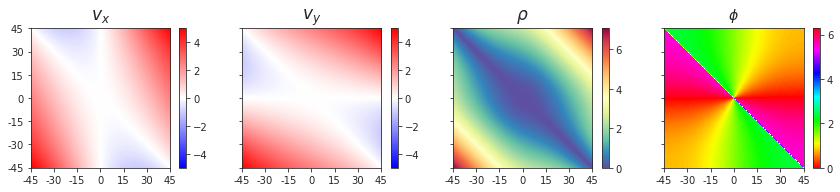

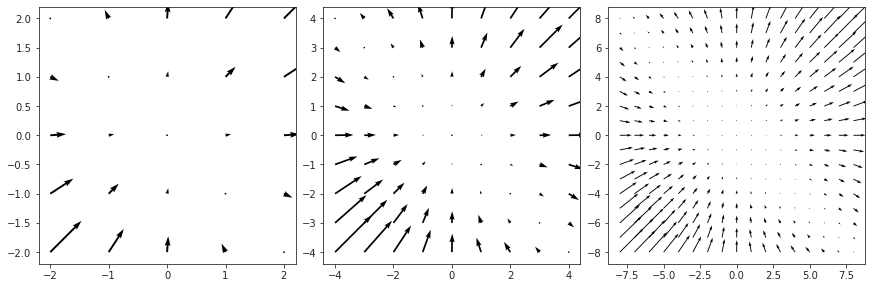

--------------------------------------------------------------------------------

--------------------------------------------------------------------------------

fixation: [0. 0.],      velocity: [ 1. -2.  0.]

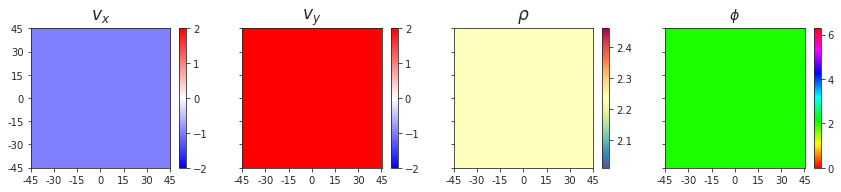

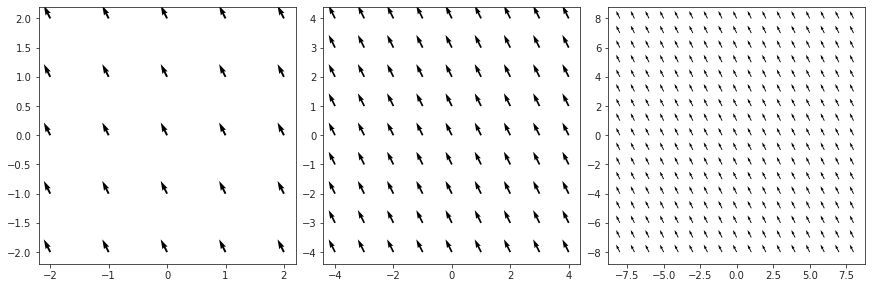

--------------------------------------------------------------------------------

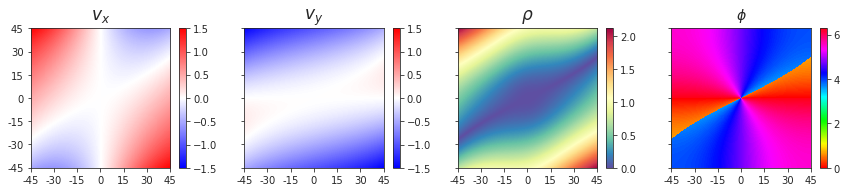

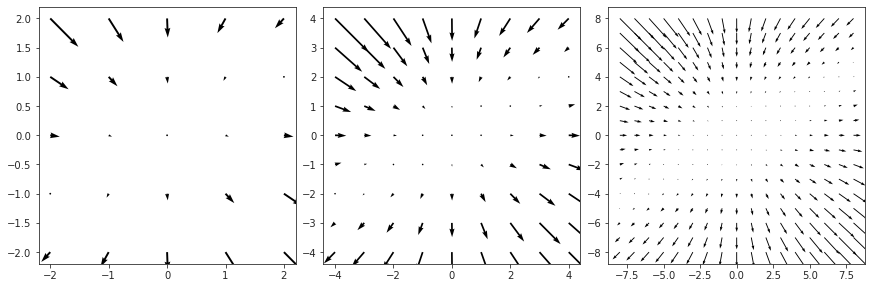

--------------------------------------------------------------------------------

--------------------------------------------------------------------------------

fixation: [0. 0.],      velocity: [ 3.  0. 10.]

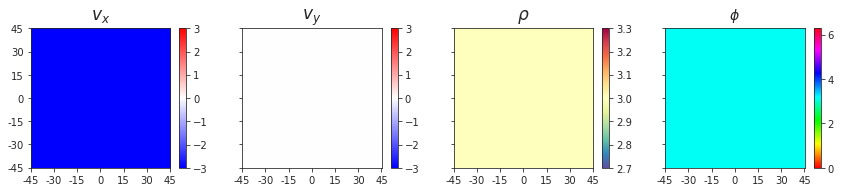

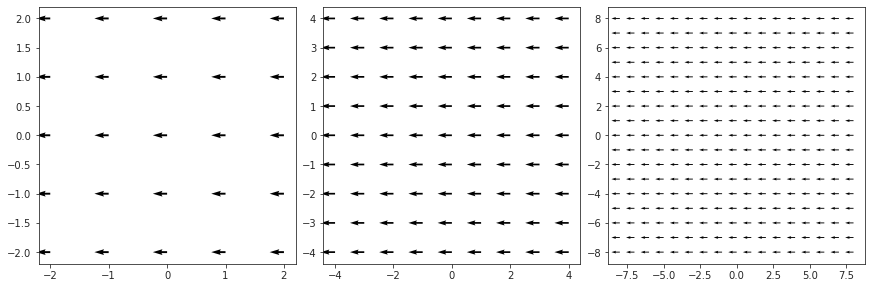

--------------------------------------------------------------------------------

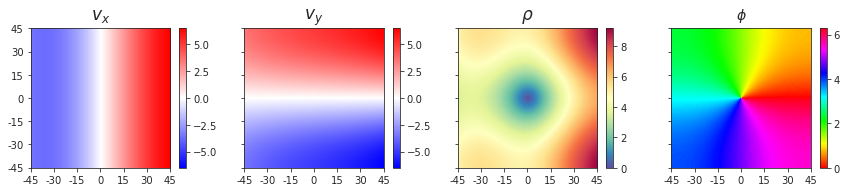

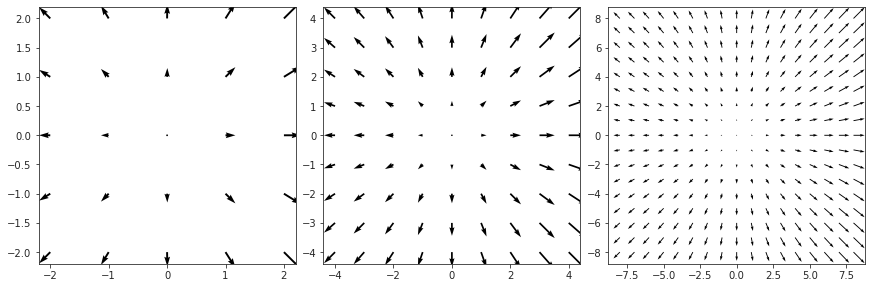

--------------------------------------------------------------------------------

--------------------------------------------------------------------------------

fixation: [0. 0.],      velocity: [3. 3. 1.]

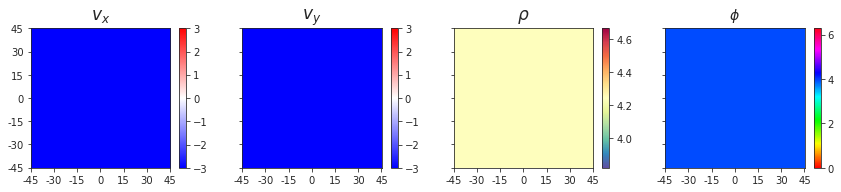

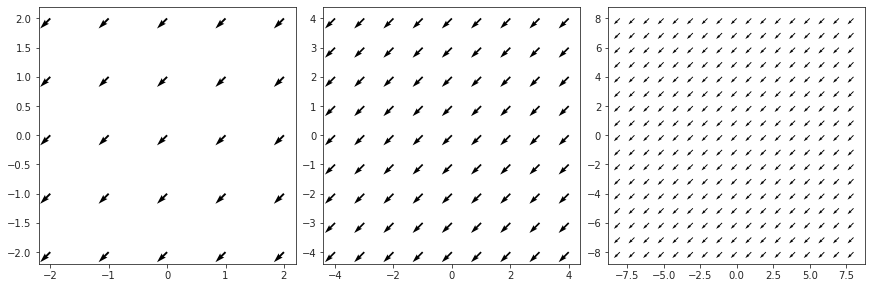

--------------------------------------------------------------------------------

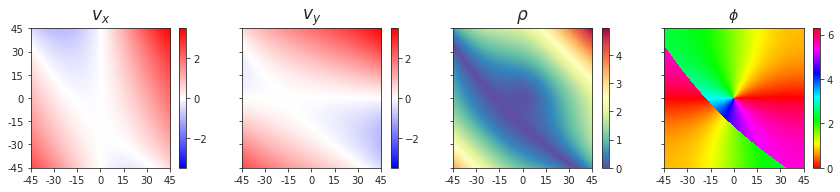

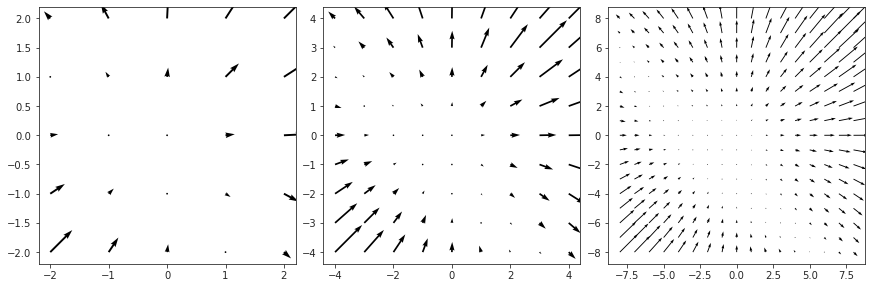

--------------------------------------------------------------------------------

--------------------------------------------------------------------------------

fixation: [0. 0.],      velocity: [-2.  1.  5.]

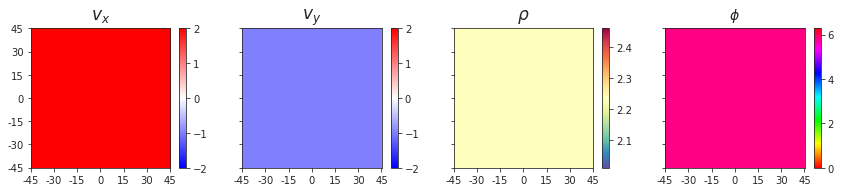

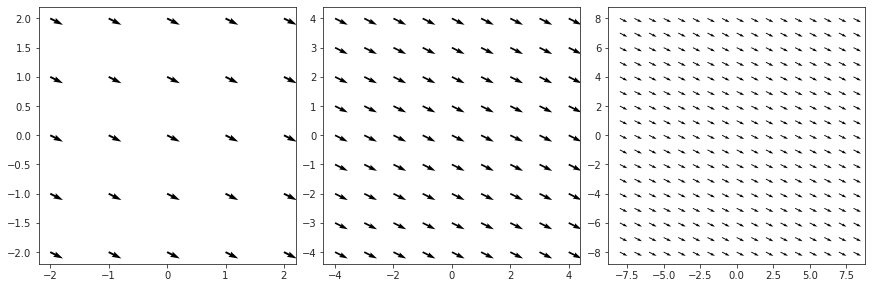

--------------------------------------------------------------------------------

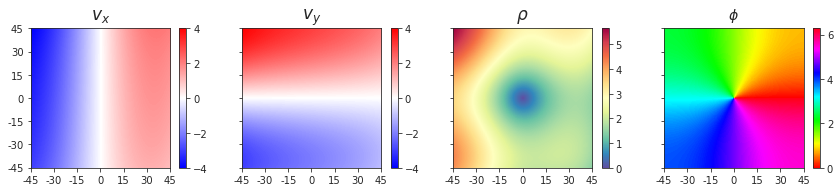

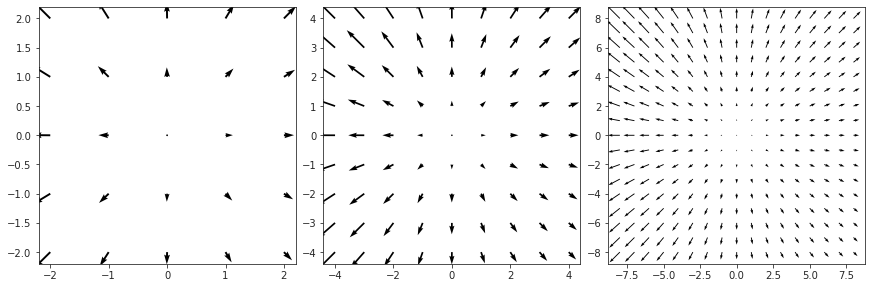

--------------------------------------------------------------------------------

--------------------------------------------------------------------------------

fixation: [0.3 0. ],    velocity: [ 0.  0. 10.]

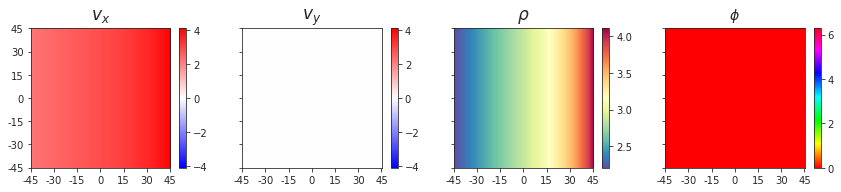

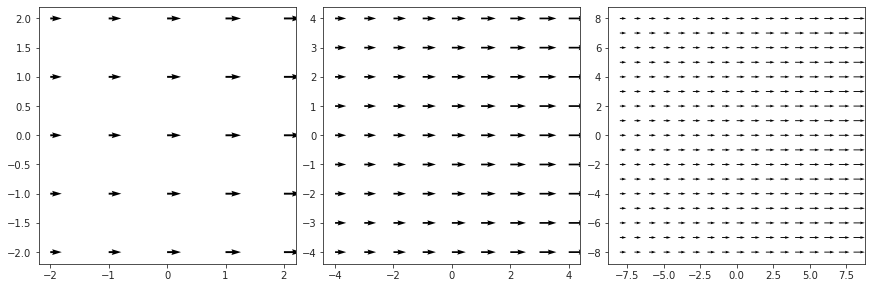

--------------------------------------------------------------------------------

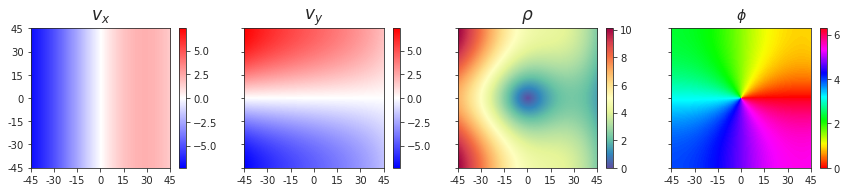

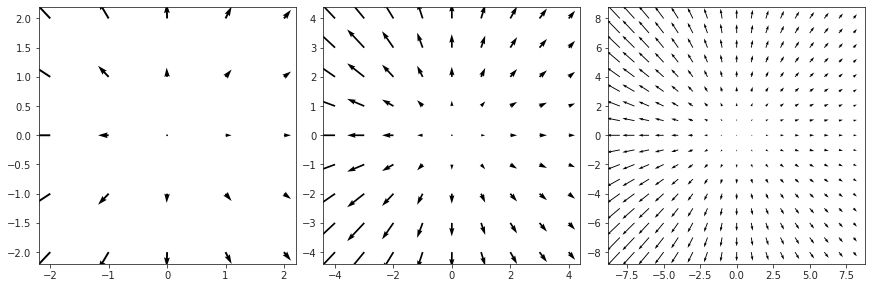

--------------------------------------------------------------------------------

--------------------------------------------------------------------------------

fixation: [0.3 0. ],    velocity: [  0.   0. -10.]

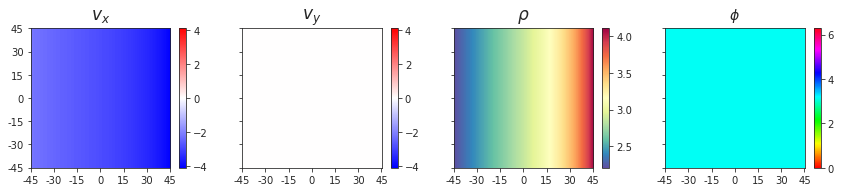

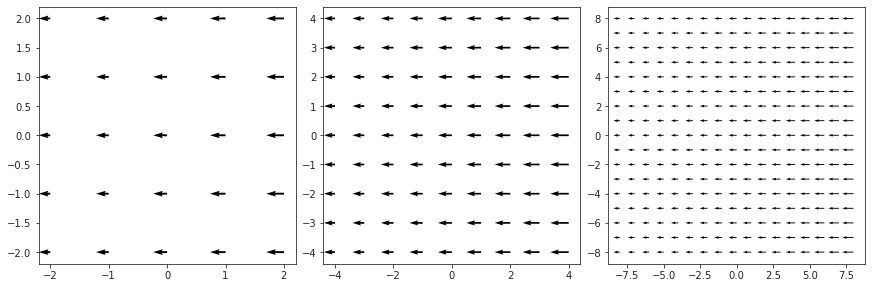

--------------------------------------------------------------------------------

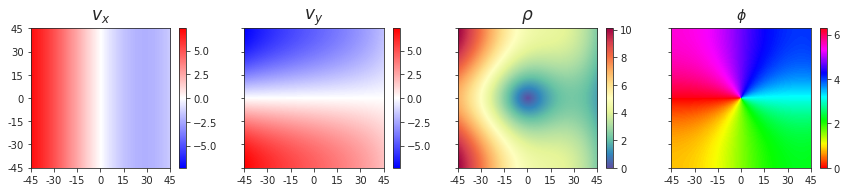

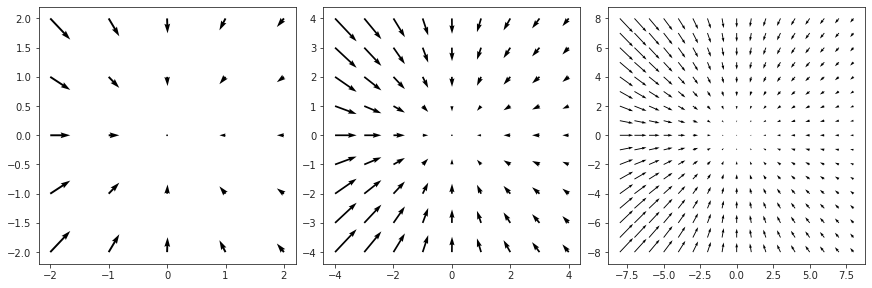

--------------------------------------------------------------------------------

--------------------------------------------------------------------------------

fixation: [0.3 0. ],    velocity: [5. 5. 0.]

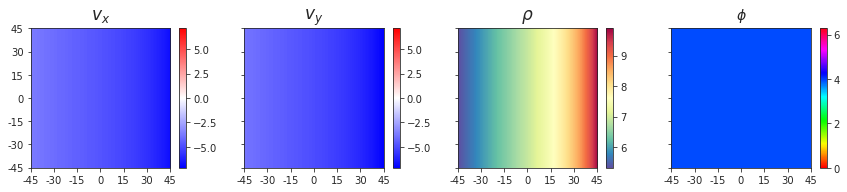

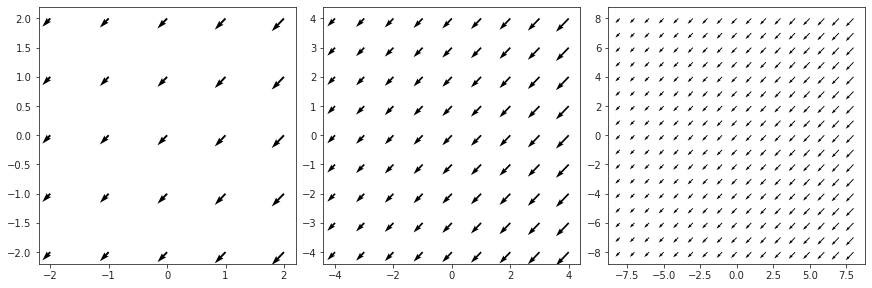

--------------------------------------------------------------------------------

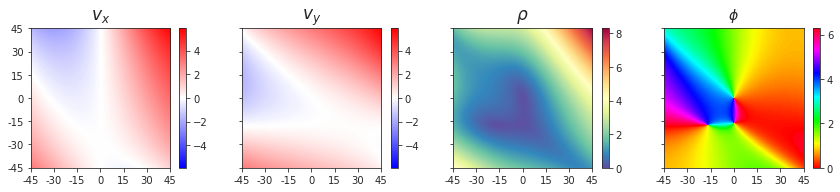

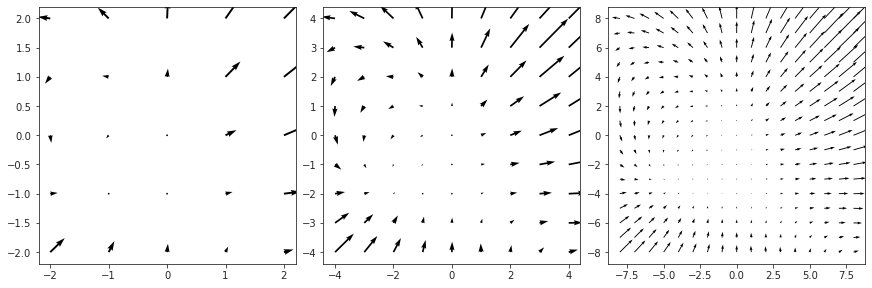

--------------------------------------------------------------------------------

--------------------------------------------------------------------------------

fixation: [0.3 0. ],    velocity: [ 1. -2.  0.]

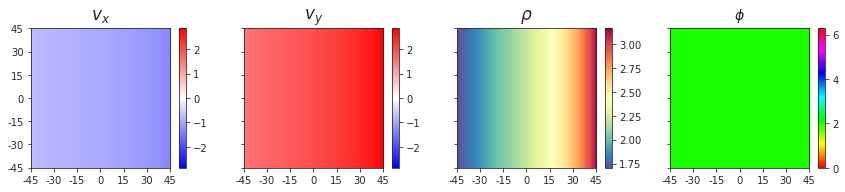

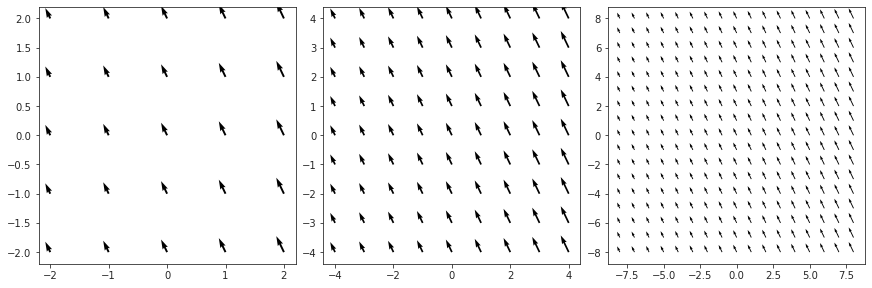

--------------------------------------------------------------------------------

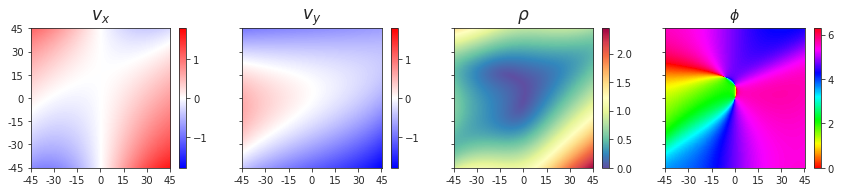

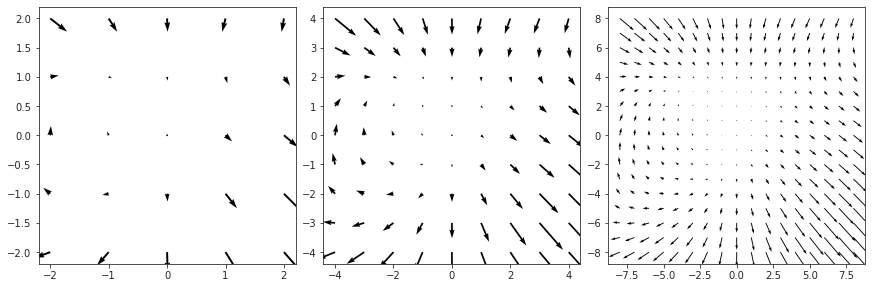

--------------------------------------------------------------------------------

--------------------------------------------------------------------------------

fixation: [0.3 0. ],    velocity: [ 3.  0. 10.]

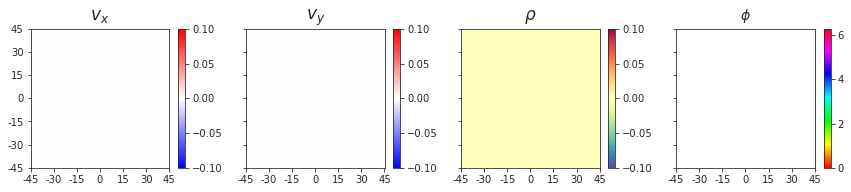

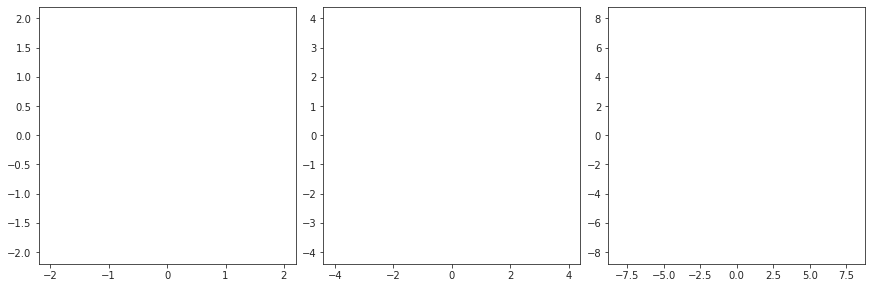

--------------------------------------------------------------------------------

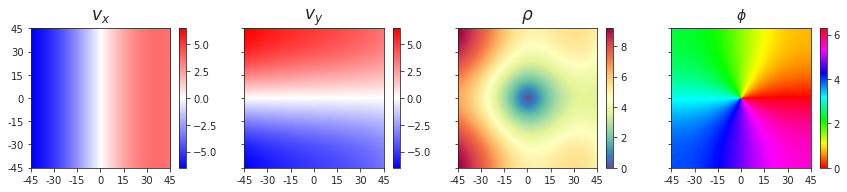

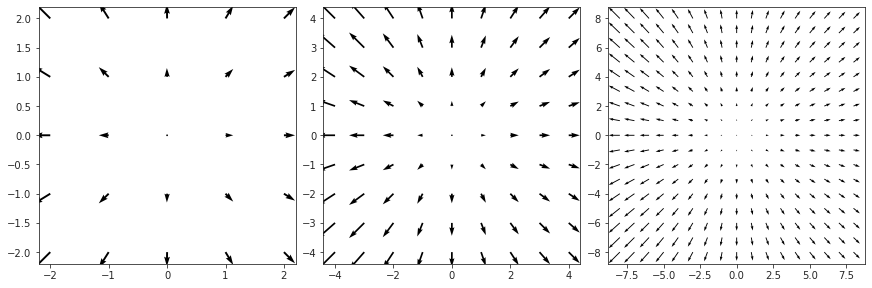

--------------------------------------------------------------------------------

--------------------------------------------------------------------------------

fixation: [0.3 0. ],    velocity: [3. 3. 1.]

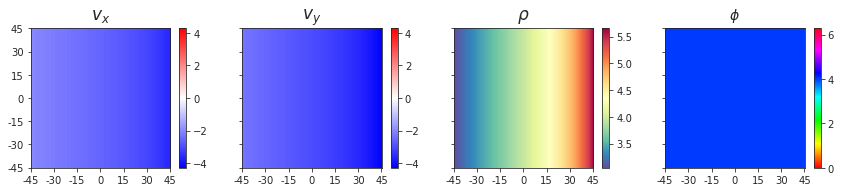

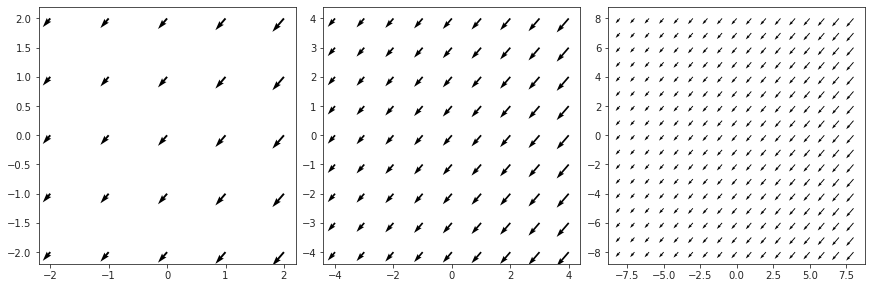

--------------------------------------------------------------------------------

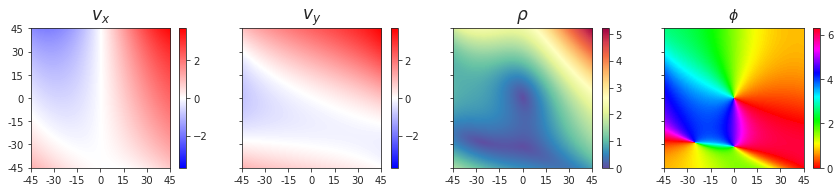

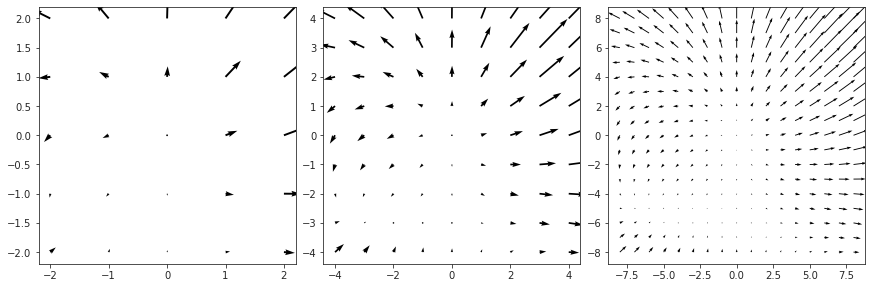

--------------------------------------------------------------------------------

--------------------------------------------------------------------------------

fixation: [0.3 0. ],    velocity: [-2.  1.  5.]

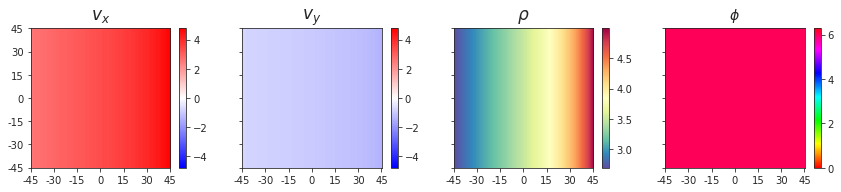

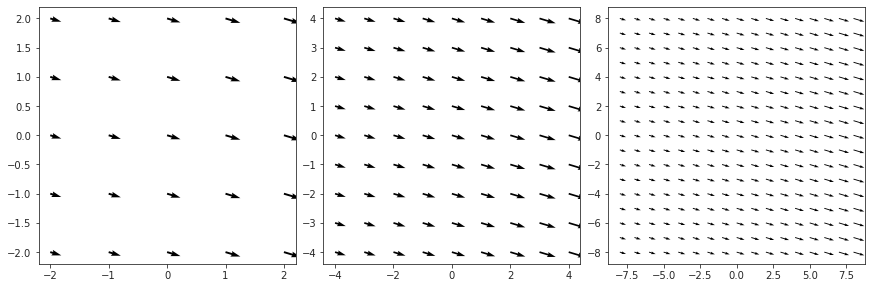

--------------------------------------------------------------------------------

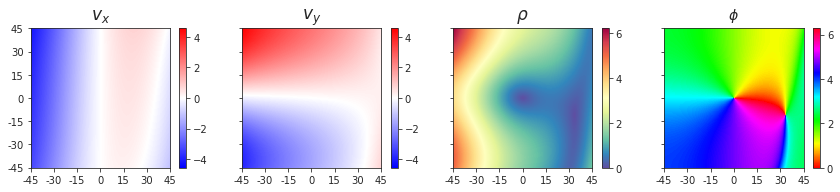

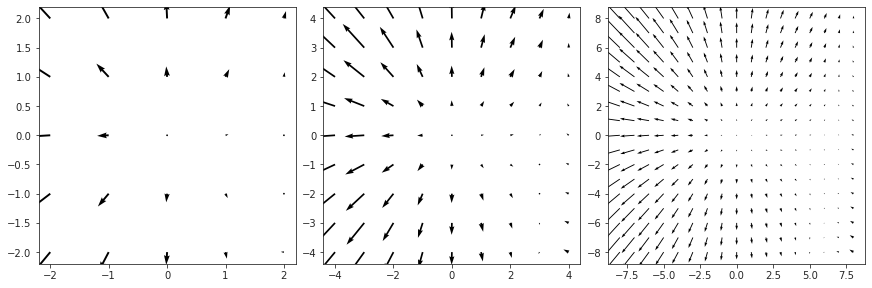

--------------------------------------------------------------------------------

--------------------------------------------------------------------------------

fixation: [0.  0.3],    velocity: [ 0.  0. 10.]

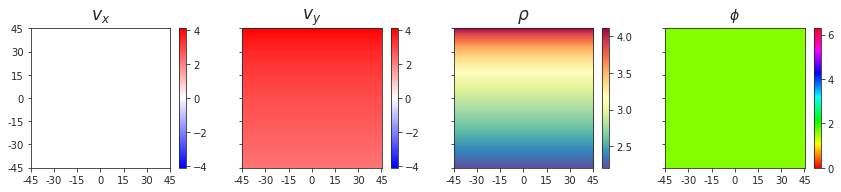

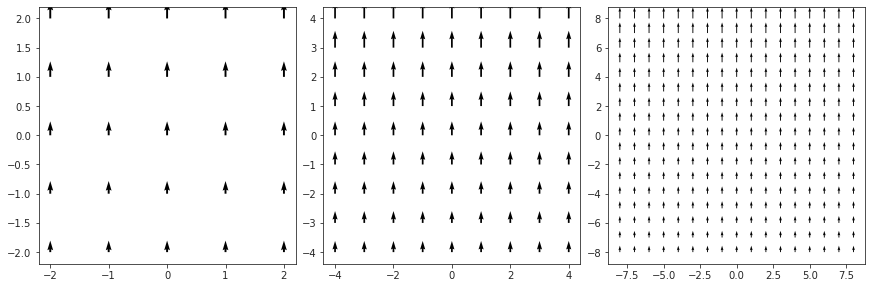

--------------------------------------------------------------------------------

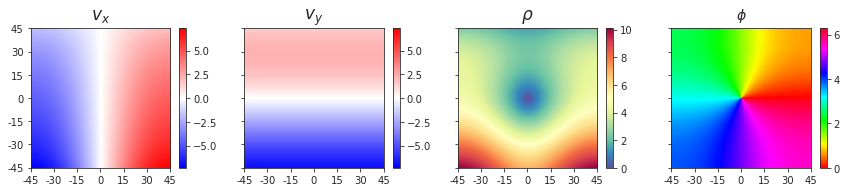

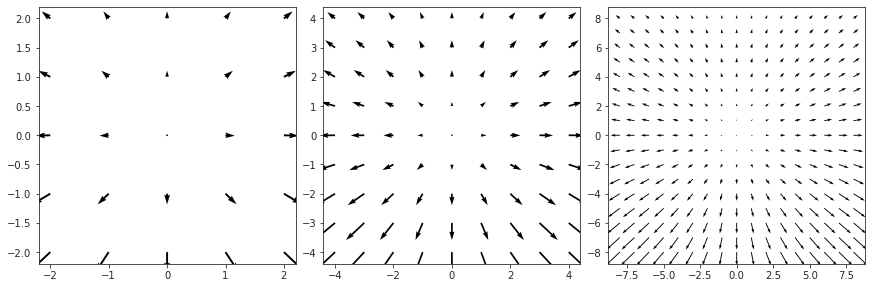

--------------------------------------------------------------------------------

--------------------------------------------------------------------------------

fixation: [0.  0.3],    velocity: [  0.   0. -10.]

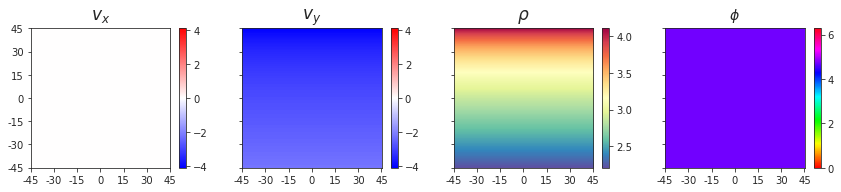

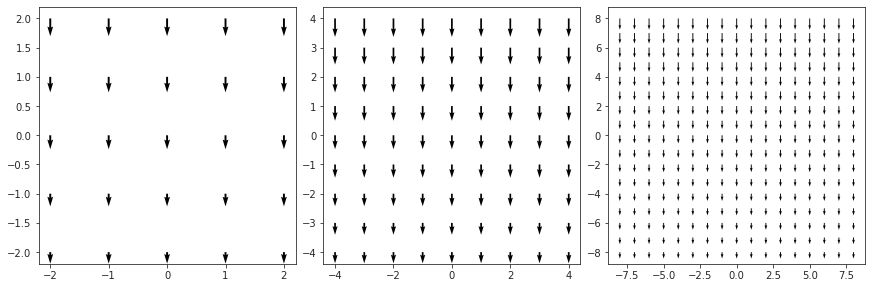

--------------------------------------------------------------------------------

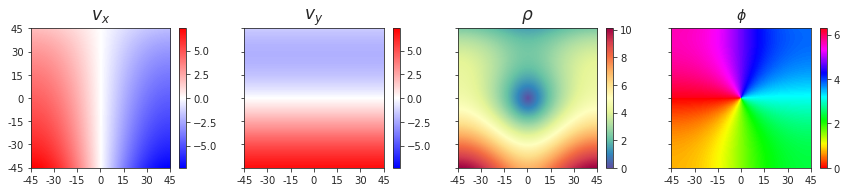

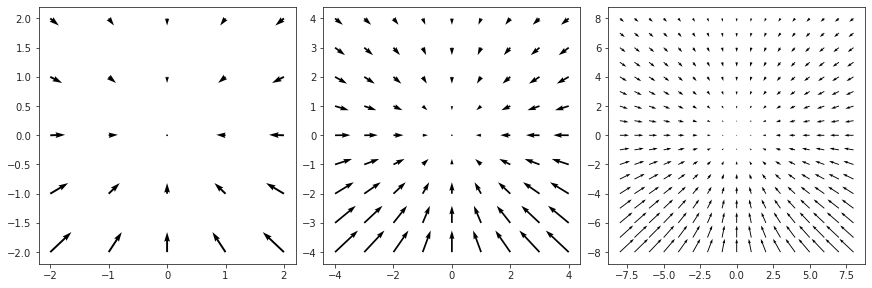

--------------------------------------------------------------------------------

--------------------------------------------------------------------------------

fixation: [0.  0.3],    velocity: [5. 5. 0.]

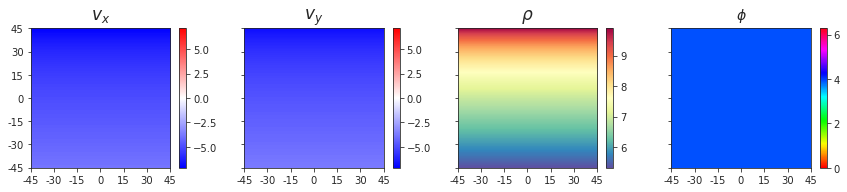

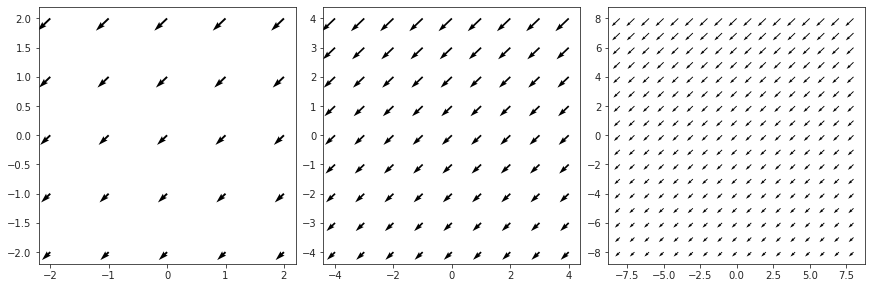

--------------------------------------------------------------------------------

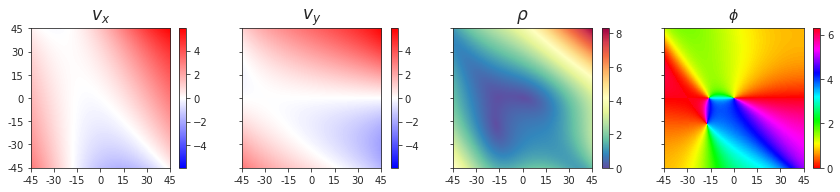

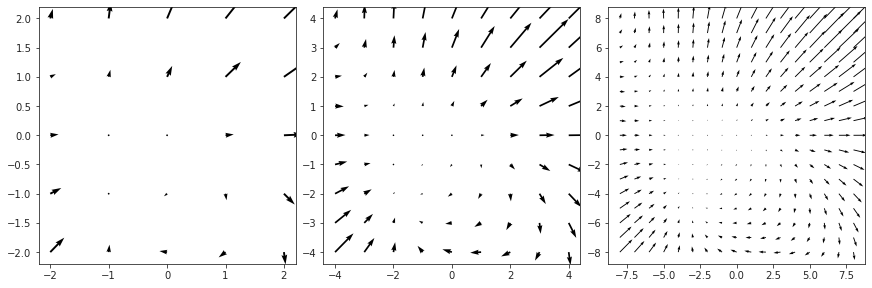

--------------------------------------------------------------------------------

--------------------------------------------------------------------------------

fixation: [0.  0.3],    velocity: [ 1. -2.  0.]

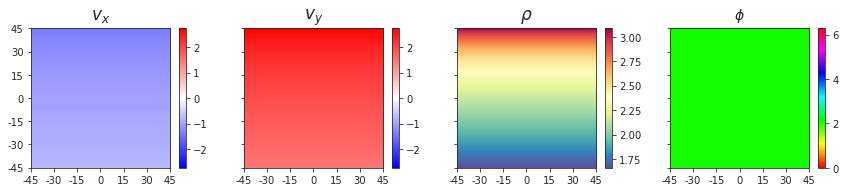

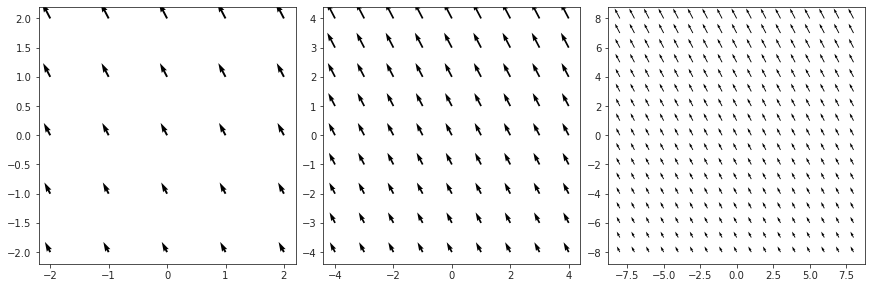

--------------------------------------------------------------------------------

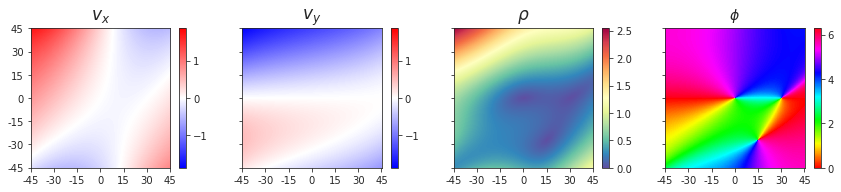

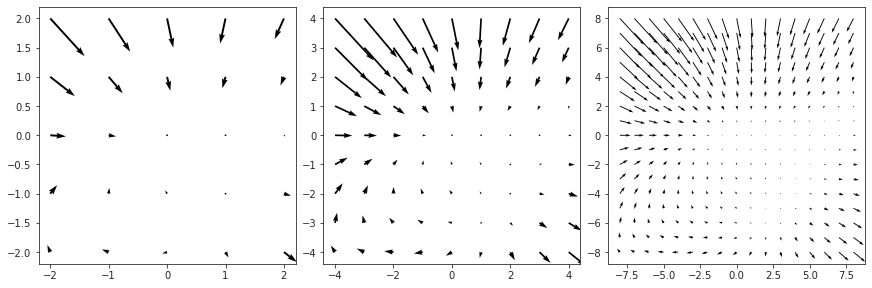

--------------------------------------------------------------------------------

--------------------------------------------------------------------------------

fixation: [0.  0.3],    velocity: [ 3.  0. 10.]

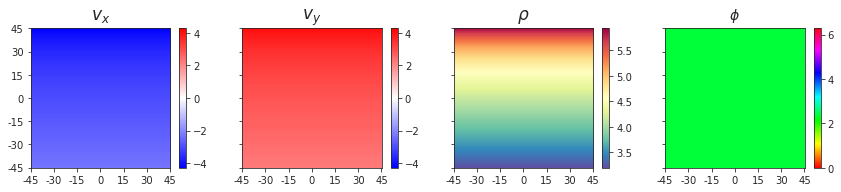

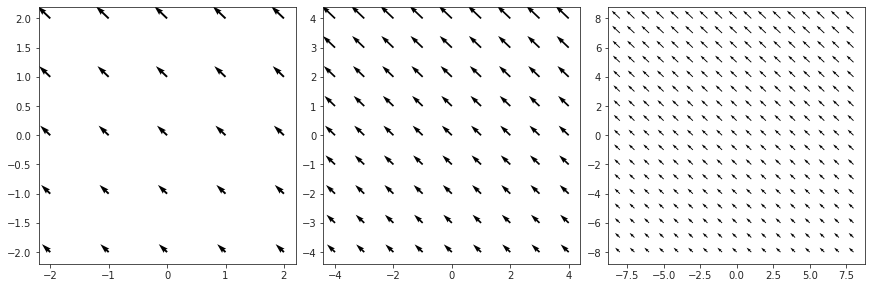

--------------------------------------------------------------------------------

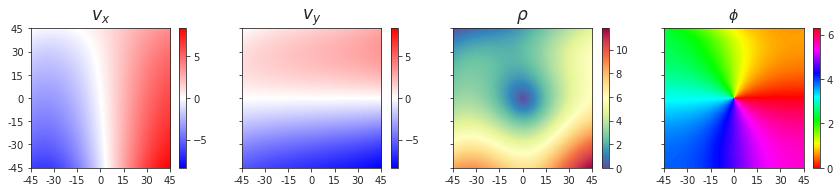

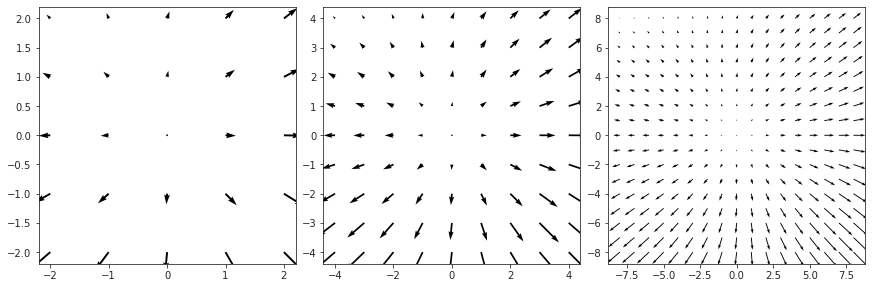

--------------------------------------------------------------------------------

--------------------------------------------------------------------------------

fixation: [0.  0.3],    velocity: [3. 3. 1.]

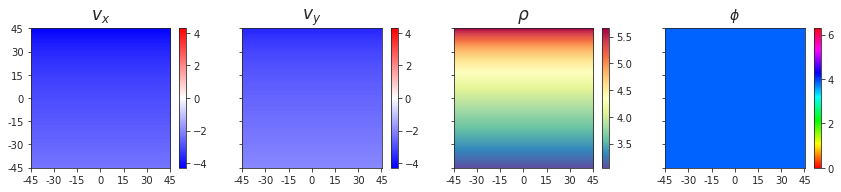

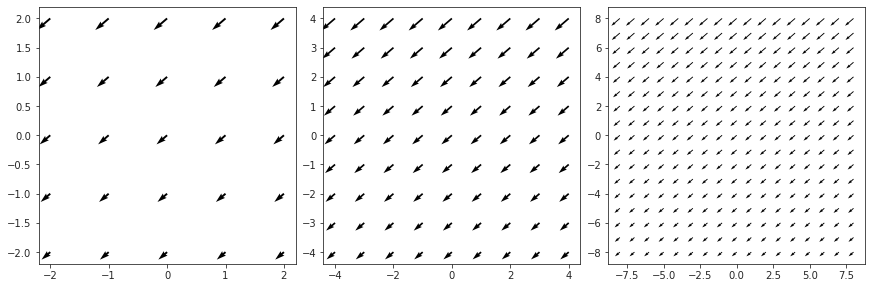

--------------------------------------------------------------------------------

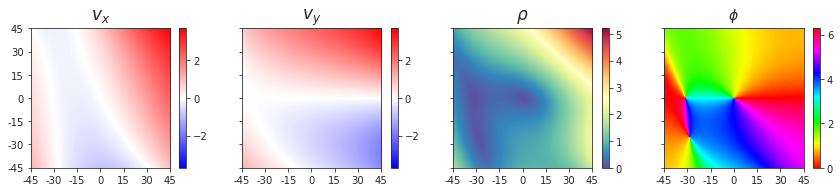

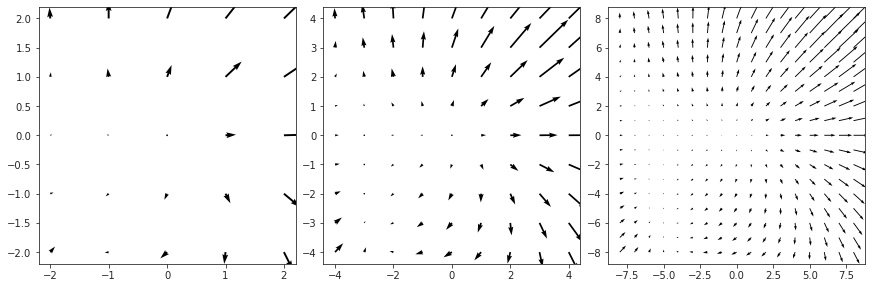

--------------------------------------------------------------------------------

--------------------------------------------------------------------------------

fixation: [0.  0.3],    velocity: [-2.  1.  5.]

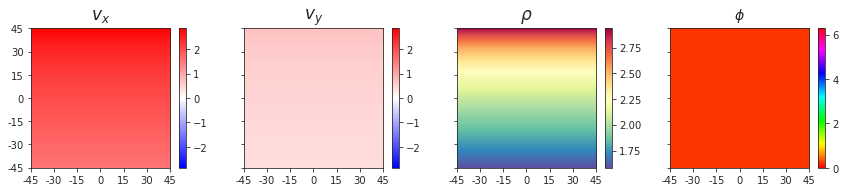

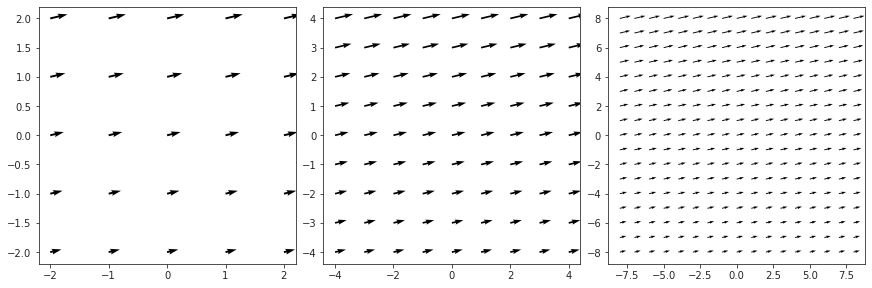

--------------------------------------------------------------------------------

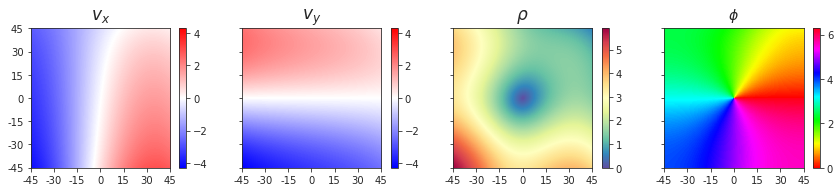

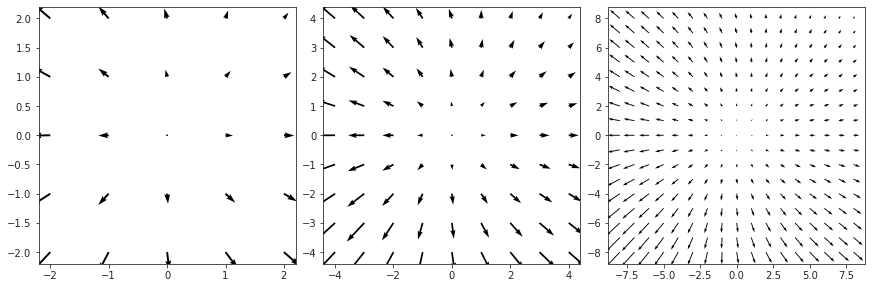

--------------------------------------------------------------------------------

--------------------------------------------------------------------------------

fixation: [0.3 0.3],    velocity: [ 0.  0. 10.]

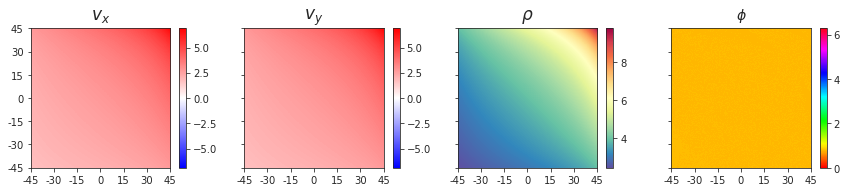

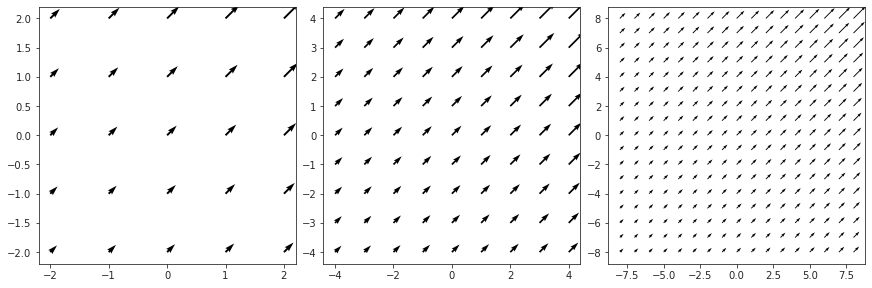

--------------------------------------------------------------------------------

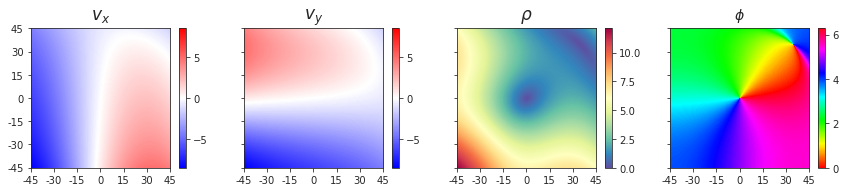

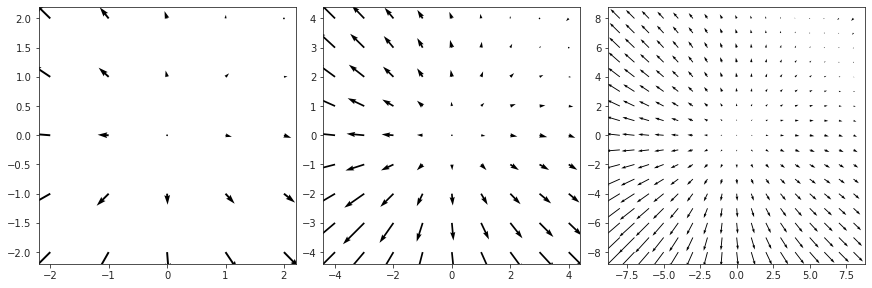

--------------------------------------------------------------------------------

--------------------------------------------------------------------------------

fixation: [0.3 0.3],    velocity: [  0.   0. -10.]

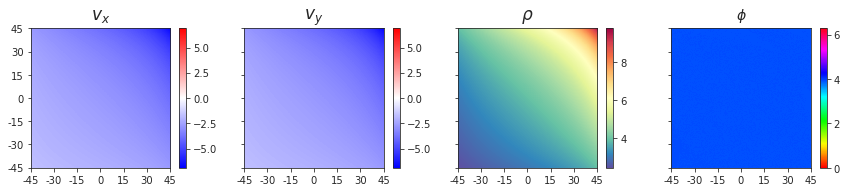

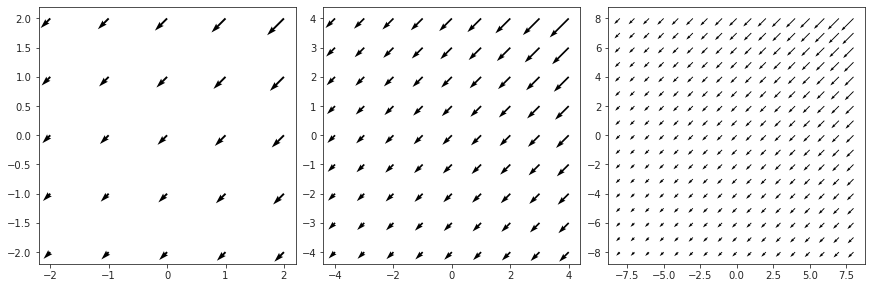

--------------------------------------------------------------------------------

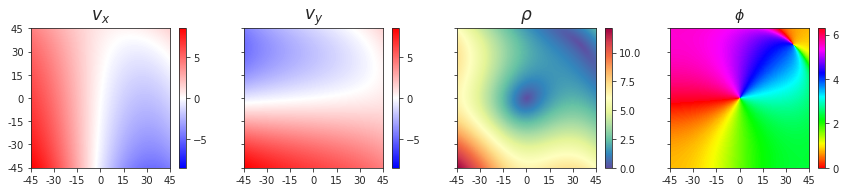

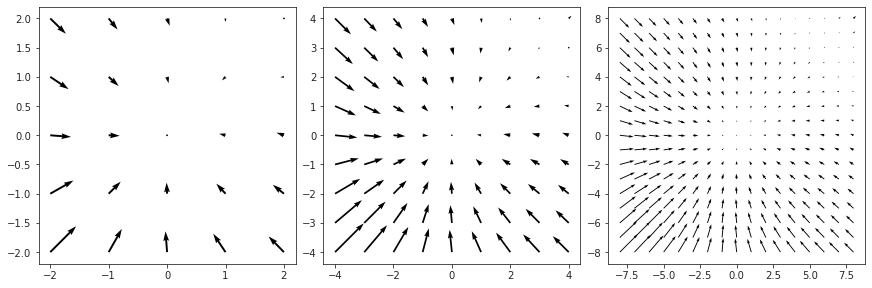

--------------------------------------------------------------------------------

--------------------------------------------------------------------------------

fixation: [0.3 0.3],    velocity: [5. 5. 0.]

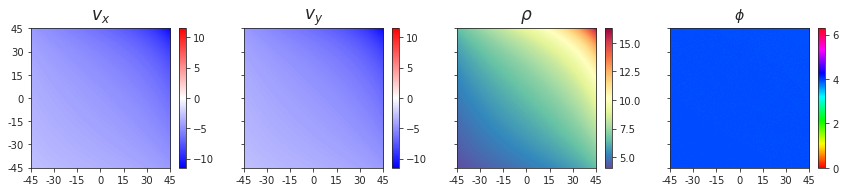

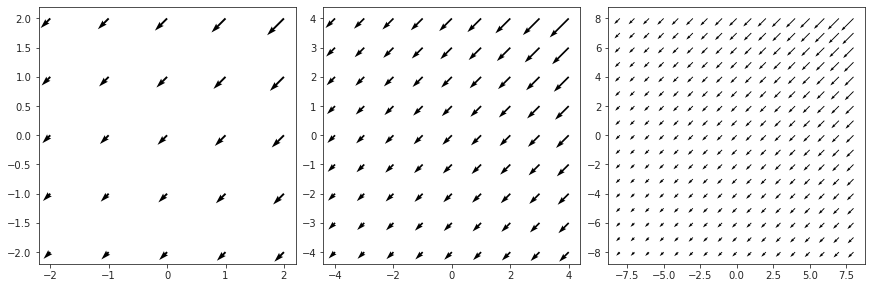

--------------------------------------------------------------------------------

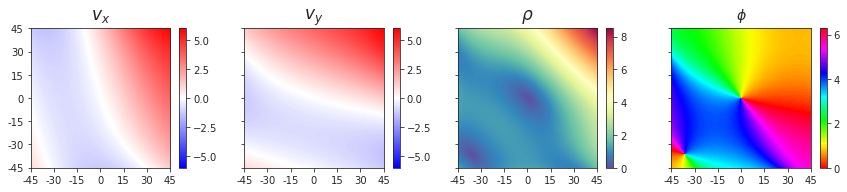

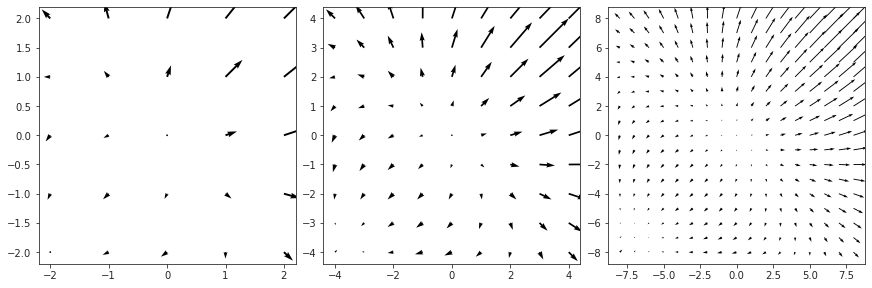

--------------------------------------------------------------------------------

--------------------------------------------------------------------------------

fixation: [0.3 0.3],    velocity: [ 1. -2.  0.]

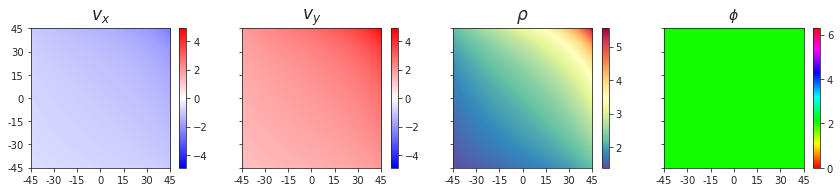

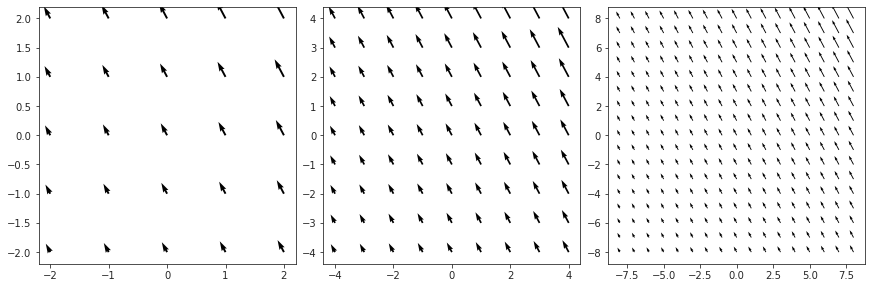

--------------------------------------------------------------------------------

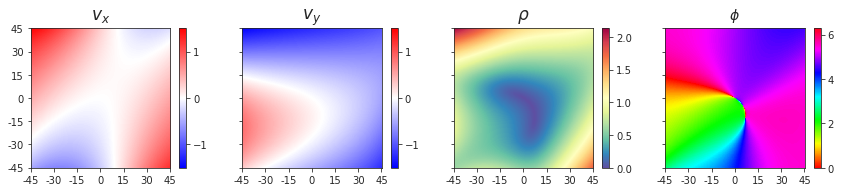

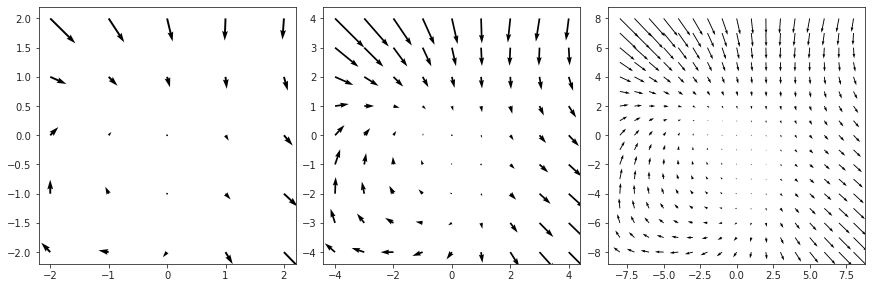

--------------------------------------------------------------------------------

--------------------------------------------------------------------------------

fixation: [0.3 0.3],    velocity: [ 3.  0. 10.]

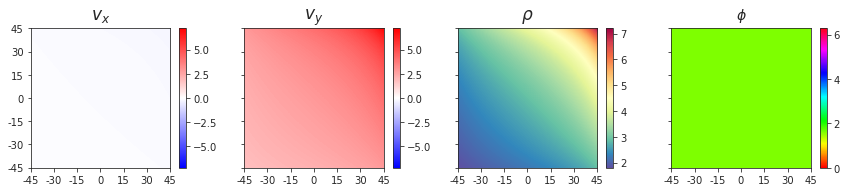

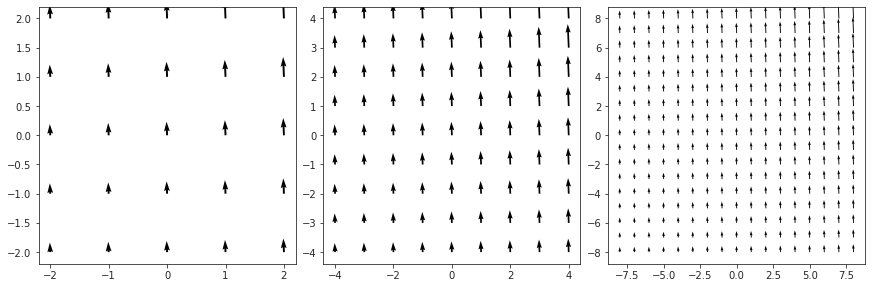

--------------------------------------------------------------------------------

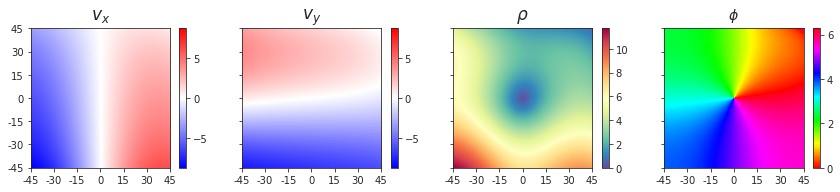

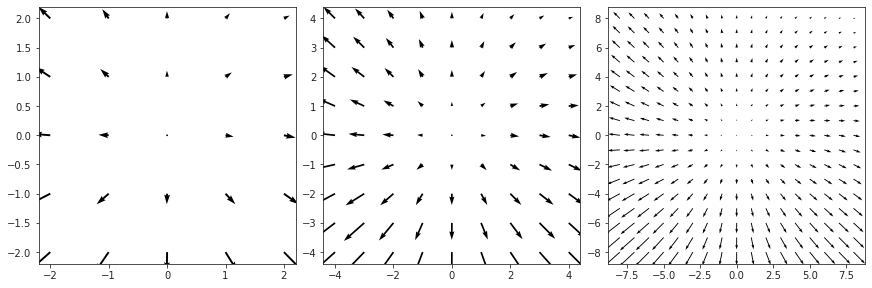

--------------------------------------------------------------------------------

--------------------------------------------------------------------------------

fixation: [0.3 0.3],    velocity: [3. 3. 1.]

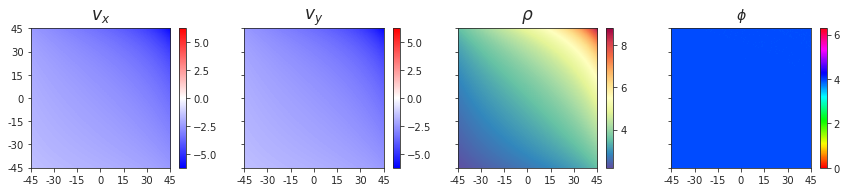

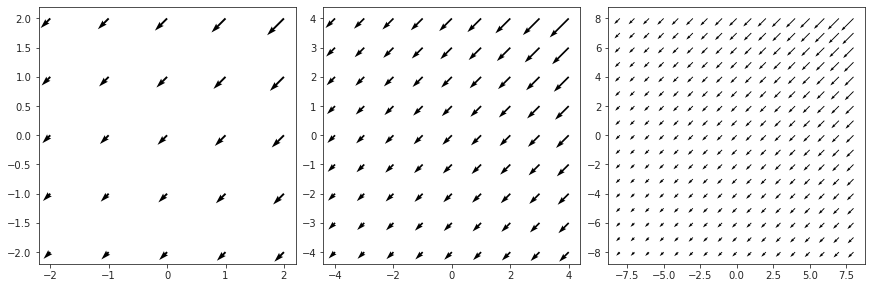

--------------------------------------------------------------------------------

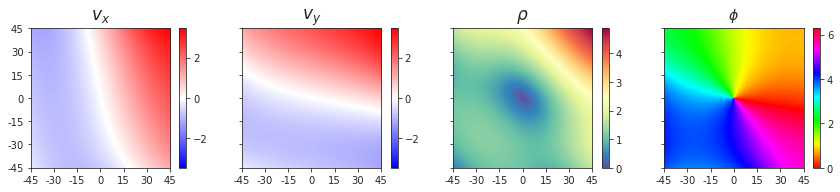

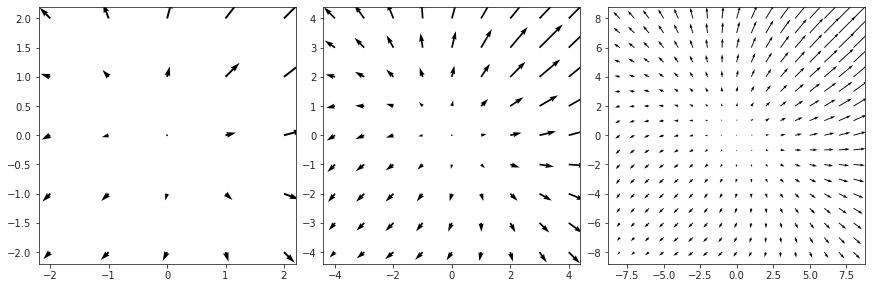

--------------------------------------------------------------------------------

--------------------------------------------------------------------------------

fixation: [0.3 0.3],    velocity: [-2.  1.  5.]

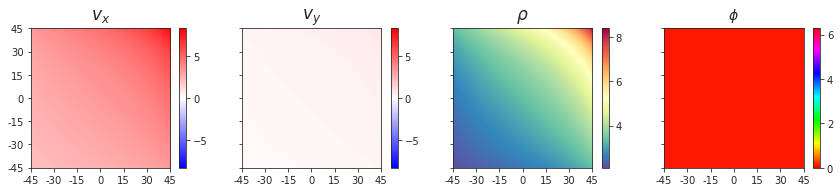

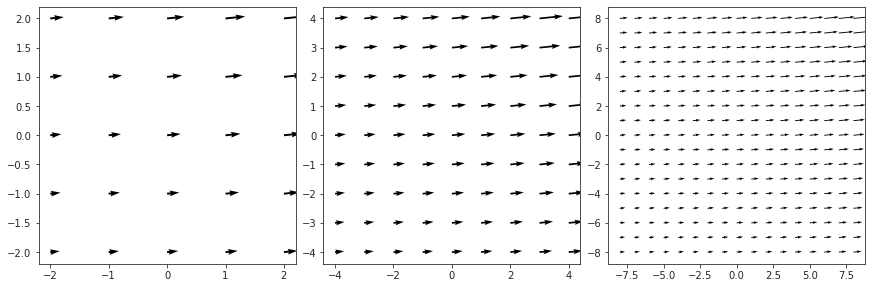

--------------------------------------------------------------------------------

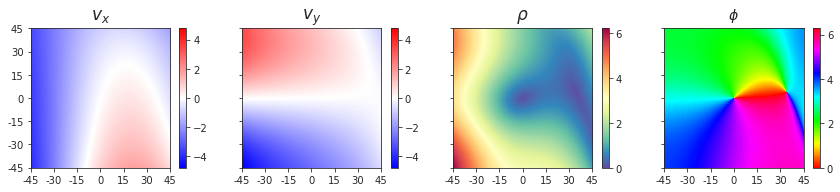

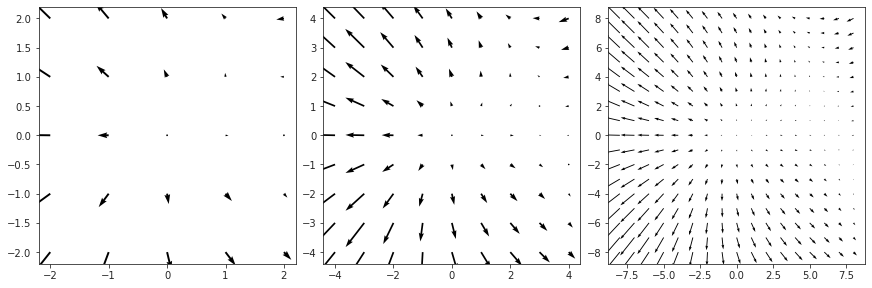

--------------------------------------------------------------------------------

--------------------------------------------------------------------------------

In [26]:
for i in range(len(fix)):
    for j in range(vel.shape[1]):
        msg = f"fixation: {fix[i]},\tvelocity: {vel[:, j]}"
        print(msg)
        
        test = v_rot[i, ..., :2, j]
        show_velocity(test)
        show_opticflow(test)

        print('\n', '-' * 80, '\n')

        test = alpha_dot[i, ..., :2, j]
        show_velocity(test)
        show_opticflow(test)
        
        print('\n', '-' * 80)
        print('-' * 80, '\n\n\n')

In [92]:
tmp = np.repeat(np.repeat(np.expand_dims(np.expand_dims(
    v, 1), 1), of.dim, 1), of.dim, 2)

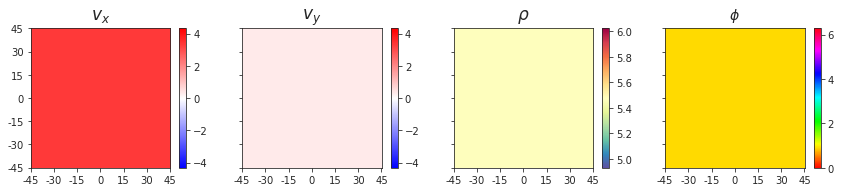

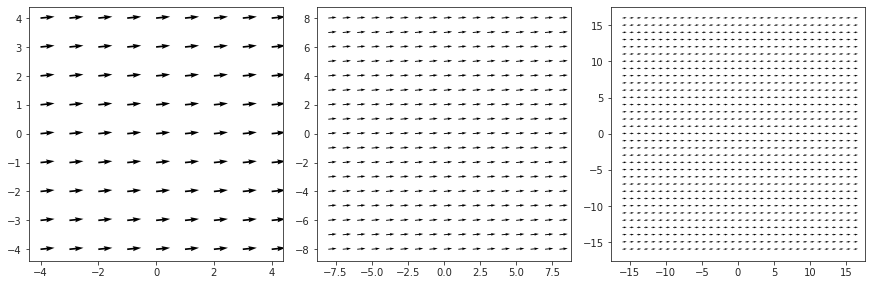

In [93]:
show_velocity(tmp[i, ..., j])
show_opticflow(tmp[i, ..., j])

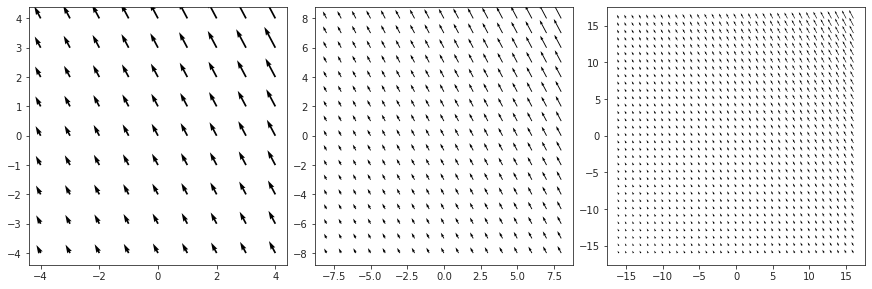

In [228]:
show_opticflow(v_rot[3, ..., 3][..., :2])

In [231]:
fix[3], vel[..., 3]

(array([0.3, 0.3]), array([ 1., -2.,  0.]))

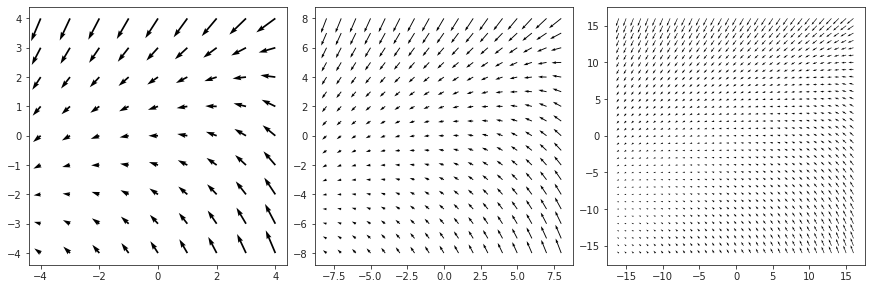

In [238]:
show_opticflow(v_rot[3, ..., 3][..., [0, 2]])